In [1]:
import numpy as np

In [2]:
competition_table=np.array([
    [  0,203,239,213],
    [ 53,  0,127,131],
    [ 28,108,  0,116],
    [ 37, 95,120,  0]
])

In [3]:
competition_table

array([[  0, 203, 239, 213],
       [ 53,   0, 127, 131],
       [ 28, 108,   0, 116],
       [ 37,  95, 120,   0]])

In [4]:
competition_table.T+competition_table

array([[  0, 256, 267, 250],
       [256,   0, 235, 226],
       [267, 235,   0, 236],
       [250, 226, 236,   0]])

In [5]:
theta=np.array([1,2,3,4])
theta.reshape(1,-1)+ theta.reshape(-1,1)

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7],
       [5, 6, 7, 8]])

In [6]:
def ret_bt_parames(n_iter,competition_table):
    assert competition_table.shape[0] == competition_table.shape[1]
    n_team=competition_table.shape[0]
    
    theta=np.ones(n_team) / n_team #this is the bt model's parameters

    n_battle_in_competition_table=competition_table+competition_table.T
    n_wins=competition_table.sum(axis=1)
    
    for iloop in range(n_iter):
        acc=(n_battle_in_competition_table/(theta.reshape(1,-1)+ theta.reshape(-1,1))).sum(axis=1)
        t=n_wins/acc
        theta = t/t.sum()
        
    return theta

In [7]:
result=ret_bt_parames(100,competition_table)
result

array([0.6481719 , 0.14189358, 0.10338365, 0.10655086])

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_formats = {'png', 'retina'}

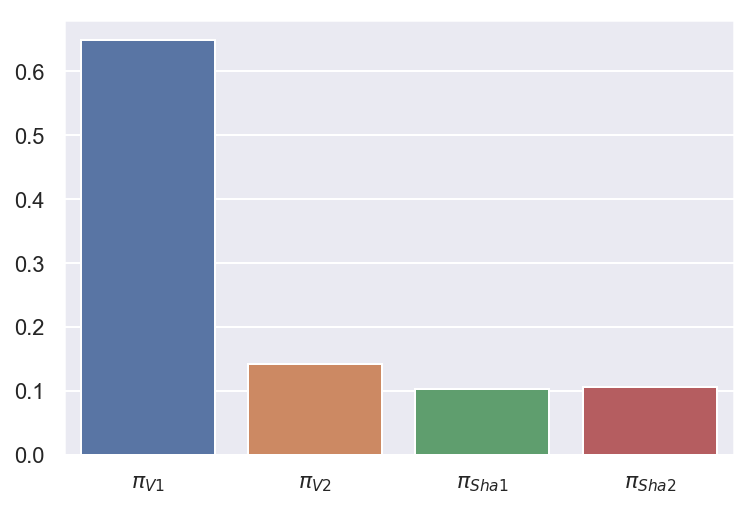

In [9]:
sns.barplot(x=['$\pi_{V1}$','$\pi_{V2}$','$\pi_{Sha1}$','$\pi_{Sha2}$'],y=result)

In [10]:
result[1]/(result[1]+result[3])

0.5711280130312318

misc

In [11]:
data1=np.random.rand(50,2)*2 -1
data2=np.random.rand(100,2)*3 -1.5
data2=data2[~((data2[:,0] < 1 ) & (data2[:,0]>-1)&(data2[:,1] < 1 ) & (data2[:,1]>-1))]

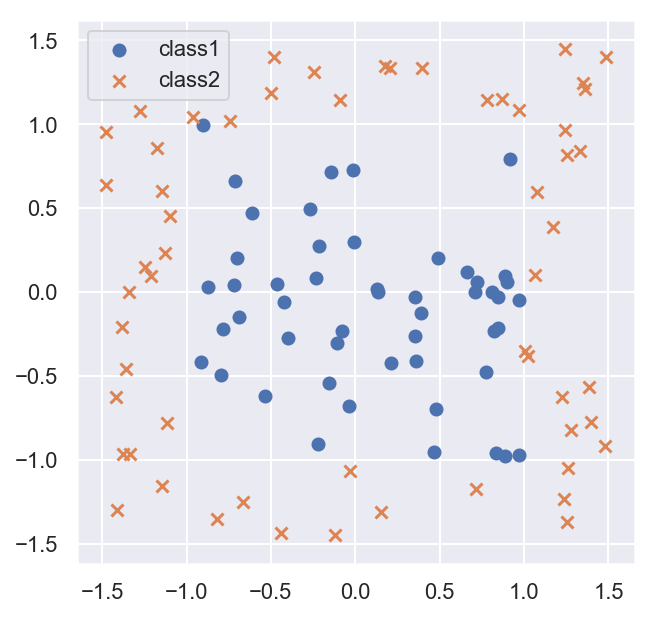

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(x=data1[:,0],y=data1[:,1],marker='o',label='class1')
plt.scatter(x=data2[:,0],y=data2[:,1],marker='x',label='class2')
plt.legend()
# plt.xlabel('V1')
# plt.ylabel('V2')

Text(0.5, 0, 'V1')

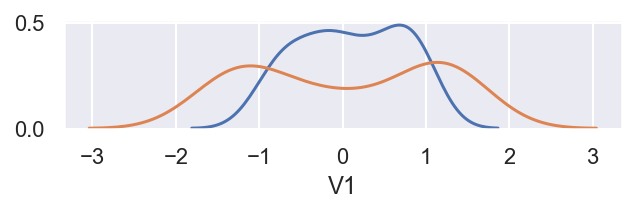

In [13]:
plt.figure(figsize=(5,1))
sns.distplot(data1[:,0],hist=None)
sns.distplot(data2[:,0],hist=None)
plt.xlabel('V1')

Text(0.5, 0, 'V2')

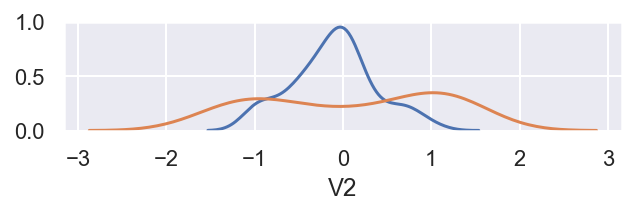

In [14]:
plt.figure(figsize=(5,1))
sns.distplot(data1[:,1],hist=None)
sns.distplot(data2[:,1],hist=None)
plt.xlabel('V2')